<a href="https://colab.research.google.com/github/yousef-taheri/Projects/blob/master/Cross%20Validation/CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import linear_model, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
breast_data=pd.read_csv(url,header=None)

breast_cancer_X=breast_data.drop([0,1],axis=1)
breast_cancer_Y=breast_data[1]

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
mice_data = pd.read_excel(url,'Hoja1')

mice_data_X=mice_data.drop(['MouseID','Genotype','Treatment','Behavior','class'],axis=1)
mice_data_Y=mice_data['class']

#fill missing values
mice_data_X=mice_data_X.fillna(value=mice_data_X.mean(axis=0).to_dict())

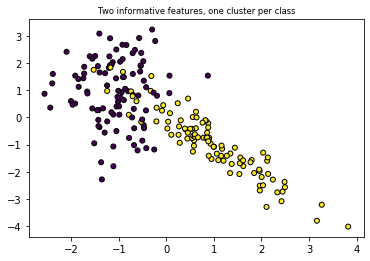

In [ ]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')


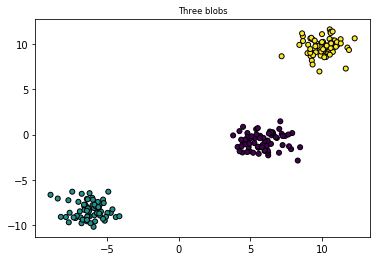

In [ ]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')


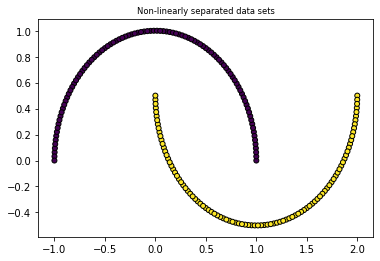

In [ ]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

In [ ]:
def fitRegPlot(X,Y):

  logreg = linear_model.LogisticRegression(C=1e5)

  logreg.fit(X, Y)

  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = .02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1, figsize=(4, 3))
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
  plt.xlabel('X')
  plt.ylabel('Y')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())

  plt.show()

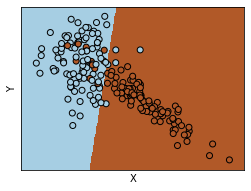

In [ ]:
fitRegPlot(X1,Y1)

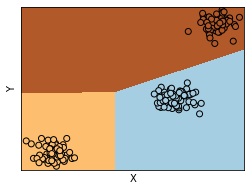

In [ ]:
fitRegPlot(X2,Y2)

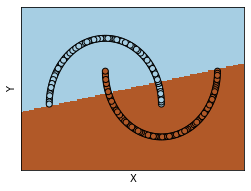

In [ ]:
fitRegPlot(X3,Y3)

In [ ]:
from sklearn.model_selection import cross_val_score
def crossValRegFit(X,y):

  logreg = linear_model.LogisticRegression(C=1e5)
  scores = cross_val_score(logreg, X, y, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
crossValRegFit(X1,Y1)

Accuracy: 0.91 (+/- 0.04)


In [ ]:
crossValRegFit(X2,Y2)

Accuracy: 1.00 (+/- 0.00)


In [ ]:
crossValRegFit(X3,Y3)

Accuracy: 0.89 (+/- 0.09)


In [ ]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll
def logistic_regression(features, target, max_steps,treshold, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    for step in range(max_steps):
        per_weights=weights.copy()
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        if np.linalg.norm(per_weights-weights)<treshold:
          print("converged in ",step," steps")
          break
        # Print log-likelihood every so often
        #if step % 10000 == 0:
        #    print(log_likelihood(features, target, weights))
    return weights


In [ ]:
mylogRegWeights = logistic_regression(X1, Y1,max_steps = 30000,treshold=1e-5, learning_rate = 5e-5, add_intercept=True)
#proba=sigmoid(np.hstack([np.ones((X_test.shape[0],1)),X_test]).dot(mylogRegWeights))

converged in  16588  steps


In [ ]:
#mylogRegWeights
np.linalg.norm((mylogRegWeights+0.004)-mylogRegWeights)

0.006928203230275516

In [ ]:
def crossValScore(X,y):
  kf = KFold(n_splits=10)
  scSklearn=[]
  scLogReg=[]
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logregSklearn = linear_model.LogisticRegression(C=1e5,max_iter=3000)
    logregSklearn.fit(X_train,y_train)
    scSklearn.append(logregSklearn.score(X_test,y_test))

    mylogRegWeights = logistic_regression(X_train, y_train,max_steps = 30000,treshold=1e-4,learning_rate = 5e-5, add_intercept=True)
    proba=sigmoid(np.hstack([np.ones((X_test.shape[0],1)),X_test]).dot(mylogRegWeights))
    scLogReg.append(accuracy_score(proba>.5,y_test))
  print("sklearn logistic regression score: ",np.array(scSklearn).mean())
  print("my logistic regression score: ",np.array(scLogReg).mean())



In [ ]:
crossValScore(X1,Y1)

converged in  6197  steps
converged in  6315  steps
converged in  6803  steps
converged in  6788  steps
converged in  6006  steps
converged in  6375  steps
converged in  6595  steps
converged in  5929  steps
converged in  6563  steps
converged in  6067  steps
sklearn logistic regression score:  0.9049999999999999
my logistic regression score:  0.9099999999999999


In [ ]:
crossValScore(X2,Y2==1)

converged in  20008  steps
converged in  20039  steps
converged in  19868  steps
converged in  19876  steps
converged in  19544  steps
converged in  19885  steps
converged in  20002  steps
converged in  19932  steps
converged in  19873  steps
converged in  19568  steps
sklearn logistic regression score:  1.0
my logistic regression score:  1.0


In [ ]:
crossValScore(X3,Y3)

sklearn logistic regression score:  0.89
my logistic regression score:  0.8800000000000001


In [ ]:
crossValScore(breast_cancer_X.values,breast_cancer_Y=='M')

In [ ]:
crossValScore(mice_data_X.values,mice_data_Y=='c-CS-m')